In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, RegressorMixin

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [30]:
# Read the CSV file
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [31]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print(df_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0            0             0                        0   
1         0            0             0                        0   
2         0            1             0                        0   
3         0            0             0                        1   
4         0            1             0                        1   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                     0             

In [32]:
testDF = df_encoded
testDF = testDF.sample(frac=1).reset_index(drop=True)
x_unscaled = testDF.drop(['diabetes'], axis=1)
y = testDF['diabetes']

# Normalize the data
numerical_columns = x_unscaled.select_dtypes(include=np.number).columns
# numerical_columns = ['age','bmi','HbA1c_level','blood_glucose_level']
# boolean_columns = list(set(x_unscaled.columns) - set(numerical_columns))
boolean_columns = x_unscaled.select_dtypes(include=bool).columns

scaler = StandardScaler()
temp = pd.DataFrame(scaler.fit_transform(x_unscaled[numerical_columns]), columns=numerical_columns)
x_scaled = pd.concat([temp, x_unscaled[boolean_columns]], axis=1)
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.base import BaseEstimator, RegressorMixin
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Check if CUDA is available and print the device being used
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Define the Encoder model with reduced complexity and dropout
# class Encoder(nn.Module):
#     def __init__(self, input_dim, encoding_dim):
#         super(Encoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(64, encoding_dim)
#         )

#     def forward(self, x):
#         return self.encoder(x)

# # Define the Decoder model with reduced complexity and dropout
# class Decoder(nn.Module):
#     def __init__(self, encoding_dim, input_dim):
#         super(Decoder, self).__init__()
#         self.decoder = nn.Sequential(
#             nn.Linear(encoding_dim, 64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(64, 128),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, input_dim)
#         )

#     def forward(self, x):
#         return self.decoder(x)


# # model without dropout
# # class Encoder(nn.Module):
# #     def __init__(self, input_dim, encoding_dim):
# #         super(Encoder, self).__init__()
# #         self.encoder = nn.Sequential(
# #             nn.Linear(input_dim, 128),
# #             nn.ReLU(),
# #             nn.Linear(128, 64),
# #             nn.ReLU(),
# #             nn.Linear(64, encoding_dim)
# #         )

# #     def forward(self, x):
# #         return self.encoder(x)

# # # Decoder without dropout
# # class Decoder(nn.Module):
# #     def __init__(self, encoding_dim, input_dim):
# #         super(Decoder, self).__init__()
# #         self.decoder = nn.Sequential(
# #             nn.Linear(encoding_dim, 64),
# #             nn.ReLU(),
# #             nn.Linear(64, 128),
# #             nn.ReLU(),
# #             nn.Linear(128, input_dim)
# #         )

# #     def forward(self, x):
# #         return self.decoder(x)
    


# # Load and preprocess data
# # Assuming x_train, x_test, y_train, and y_test are already defined and normalized
# x_train_scaled = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
# x_val_scaled = x_val.values if isinstance(x_val, pd.DataFrame) else x_val
# x_test_scaled = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# # Define input dimensions
# input_dim = x_train_scaled.shape[1]

# # Model file paths
# encoder_model_file = './models/encoder2.pth'
# decoder_model_file = './models/decoder2.pth'

# # Hyperparameters
# encoding_dim = 8
# learning_rate = 0.001
# epochs = 1000
# batch_size = 64
# patience = 10

# # Check if the model files exist
# if os.path.exists(encoder_model_file) and os.path.exists(decoder_model_file):
#     print("Model files exist. Loading the models...")
#     encoder = Encoder(input_dim, encoding_dim).to(device)
#     decoder = Decoder(encoding_dim, input_dim).to(device)
#     encoder.load_state_dict(torch.load(encoder_model_file))
#     decoder.load_state_dict(torch.load(decoder_model_file))
# else:
#     print("Model files do not exist. Training new models...")

#     # Initialize the encoder and decoder models
#     encoder = Encoder(input_dim, encoding_dim).to(device)
#     decoder = Decoder(encoding_dim, input_dim).to(device)
#     optimizer_encoder = optim.Adam(encoder.parameters(), lr=learning_rate)
#     optimizer_decoder = optim.Adam(decoder.parameters(), lr=learning_rate)
#     criterion = nn.MSELoss()

#     # Track training loss
#     encoder_losses = []
#     decoder_losses = []

#     # Train the Encoder separately
#     encoder.train()
#     best_val_loss = float('inf')
#     patience_counter = 0
#     for epoch in range(epochs):
#         epoch_loss = 0
#         dataloader = DataLoader(TensorDataset(torch.tensor(x_train_scaled, dtype=torch.float32).to(device), torch.tensor(x_train_scaled, dtype=torch.float32).to(device)), batch_size=batch_size, shuffle=True, num_workers=0)
#         for i, (batch_X, _) in enumerate(dataloader):
#             batch_X = batch_X.to(device)
#             optimizer_encoder.zero_grad()
#             encoded = encoder(batch_X)
#             # Pass the encoded output through the decoder
#             decoded = decoder(encoded)
#             # Calculate loss between decoder output and original input
#             loss = criterion(decoded, batch_X)
#             loss.backward()
            
#             optimizer_encoder.step()
#             optimizer_encoder.zero_grad()
            
#             epoch_loss += loss.item()
#         avg_loss = epoch_loss / len(dataloader)
#         encoder_losses.append(avg_loss)
#         print(f"Epoch [{epoch+1}/{epochs}], Encoder Loss: {avg_loss:.4f}")

#         # Validation loss
#         encoder.eval()
#         decoder.eval()
#         with torch.no_grad():
#             val_encoded = encoder(torch.tensor(x_val_scaled, dtype=torch.float32).to(device))
#             val_decoded = decoder(val_encoded)
#             val_loss = criterion(val_decoded, torch.tensor(x_val_scaled, dtype=torch.float32).to(device)).item()
#         print(f"Validation Loss: {val_loss:.4f}")

#         # Early stopping
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1
#             if patience_counter >= patience:
#                 print("Early stopping triggered.")
#                 break

#     # Train the Decoder separately
#     encoded_train = encoder(torch.tensor(x_train_scaled, dtype=torch.float32).to(device)).detach()
#     decoder.train()
#     best_val_loss = float('inf')
#     patience_counter = 0
#     for epoch in range(epochs):
#         epoch_loss = 0
#         dataloader = DataLoader(TensorDataset(encoded_train, torch.tensor(x_train_scaled, dtype=torch.float32).to(device)), batch_size=batch_size, shuffle=True, num_workers=0)
#         for i, (batch_X, batch_y) in enumerate(dataloader):
#             batch_X, batch_y = batch_X.to(device), batch_y.to(device)
#             optimizer_decoder.zero_grad()
#             outputs = decoder(batch_X)
#             # Calculate loss between decoder output and original input
#             loss = criterion(outputs, batch_y)
#             loss.backward()
            
#             optimizer_decoder.step()
#             optimizer_decoder.zero_grad()
            
#             epoch_loss += loss.item()
#         avg_loss = epoch_loss / len(dataloader)
#         decoder_losses.append(avg_loss)
#         print(f"Epoch [{epoch+1}/{epochs}], Decoder Loss: {avg_loss:.4f}")

#         # Validation loss
#         decoder.eval()
#         with torch.no_grad():
#             val_outputs = decoder(encoded_train)
#             val_loss = criterion(val_outputs, torch.tensor(x_train_scaled, dtype=torch.float32).to(device)).item()
#         print(f"Validation Loss: {val_loss:.4f}")

#         # Early stopping
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1
#             if patience_counter >= patience:
#                 print("Early stopping triggered.")
#                 break

#     # Save the trained models
#     os.makedirs('./models', exist_ok=True)
#     torch.save(encoder.state_dict(), encoder_model_file)
#     torch.save(decoder.state_dict(), decoder_model_file)
#     print("Models trained and saved.")

# # Combine Encoder and Decoder to form the Autoencoder
# class Autoencoder(nn.Module):
#     def __init__(self, encoder, decoder):
#         super(Autoencoder, self).__init__()
#         self.encoder = encoder
#         self.decoder = decoder

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

# autoencoder = Autoencoder(encoder, decoder).to(device)
# autoencoder.eval()

# # Calculate reconstruction error on the test set
# with torch.no_grad():
#     reconstructed_test = autoencoder(torch.tensor(x_test_scaled, dtype=torch.float32).to(device)).cpu().numpy()

# # Calculate Reconstruction Error Percentage
# reconstruction_error_percentage = (
#     np.mean(np.abs(x_test_scaled - reconstructed_test) / (np.abs(x_test_scaled) + 1e-8), axis=1) * 100
# )  # Prevent division by zero using 1e-8

# reconstruction_error_percentage_mean = np.mean(reconstruction_error_percentage)

# def calculate_error_for_index(index):
#     return np.mean(np.abs(x_test_scaled[index] - reconstructed_test[index]) / (np.abs(x_test_scaled[index]) + 1e-8)) * 100

# greater_than_mean = 0
# less_than_20 = 0
# for i in range(x_test_scaled.shape[0]):
#     if (calculate_error_for_index(i) > reconstruction_error_percentage_mean):
#         greater_than_mean += 1
#     elif (calculate_error_for_index(i) < 25):
#         less_than_20 += 1
        
# print("Number of outliers: ", greater_than_mean)
# print("Number of inliers: ", less_than_20)
# print("Error percentage mean: ", reconstruction_error_percentage_mean)


# # calcualting the mse and mae
# mse = np.mean((x_test_scaled - reconstructed_test) ** 2)
# mae = np.mean(np.abs(x_test_scaled - reconstructed_test))

# print("Mean Squared Error: ", mse)
# print("Mean Absolute Error: ", mae)

In [34]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_size, encoding_dim, dropout):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
def train_autoencoder(x_train, x_val, learning_rate=0.001, hidden_size=128, batch_size=64, dropout=0.2, encoding_dim=8, epochs=200, patience=10, model_path='./models/autoencoder.pth'):
    
    x_train_scaled = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
    x_val_scaled = x_val.values if isinstance(x_val, pd.DataFrame) else x_val
    input_dim = x_train_scaled.shape[1]
    
    autoencoder = Autoencoder(input_dim, hidden_size, encoding_dim, dropout).to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    dataloader = DataLoader(TensorDataset(torch.tensor(x_train_scaled, dtype=torch.float32).to(device)), batch_size=batch_size, shuffle=True)
    
    best_val_loss = float('inf')
    patience_counter = 0
    for epoch in range(epochs):
        epoch_loss = 0
        autoencoder.train()
        for batch_X, in dataloader:
            batch_X = batch_X.to(device)
            optimizer.zero_grad()
            outputs = autoencoder(batch_X)
            loss = criterion(outputs, batch_X)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(dataloader)
        
        autoencoder.eval()
        with torch.no_grad():
            val_outputs = autoencoder(torch.tensor(x_val_scaled, dtype=torch.float32).to(device))
            val_loss = criterion(val_outputs, torch.tensor(x_val_scaled, dtype=torch.float32).to(device)).item()
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # torch.save(autoencoder.state_dict(), model_path)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break
    
    print("Training complete. Best model saved.")
    return autoencoder


Using device: cuda


In [35]:
# Hyperparaemters
learning_rate = 0.001
hidden_size = 128
batch_size = 64
dropout = 0.2
encoding_dim = 8

model_path = './models/autoencoder.pth'
autoencoder_model = train_autoencoder(x_train, x_val, learning_rate=learning_rate, hidden_size=hidden_size, batch_size=batch_size, dropout=dropout, encoding_dim=encoding_dim, epochs=200, patience=10, model_path=model_path)

Epoch [1/200], Loss: 0.3551, Val Loss: 0.0680
Epoch [2/200], Loss: 0.1969, Val Loss: 0.0464
Epoch [3/200], Loss: 0.1622, Val Loss: 0.0355
Epoch [4/200], Loss: 0.1444, Val Loss: 0.0309
Epoch [5/200], Loss: 0.1410, Val Loss: 0.0428
Epoch [6/200], Loss: 0.1294, Val Loss: 0.0252
Epoch [7/200], Loss: 0.1177, Val Loss: 0.0308
Epoch [8/200], Loss: 0.1121, Val Loss: 0.0223
Epoch [9/200], Loss: 0.1134, Val Loss: 0.0254
Epoch [10/200], Loss: 0.1102, Val Loss: 0.0184
Epoch [11/200], Loss: 0.1075, Val Loss: 0.0199
Epoch [12/200], Loss: 0.0927, Val Loss: 0.0188
Epoch [13/200], Loss: 0.1073, Val Loss: 0.0188
Epoch [14/200], Loss: 0.1008, Val Loss: 0.0178
Epoch [15/200], Loss: 0.1062, Val Loss: 0.0186
Epoch [16/200], Loss: 0.0902, Val Loss: 0.0191
Epoch [17/200], Loss: 0.0911, Val Loss: 0.0190
Epoch [18/200], Loss: 0.0941, Val Loss: 0.0147
Epoch [19/200], Loss: 0.0931, Val Loss: 0.0181
Epoch [20/200], Loss: 0.0963, Val Loss: 0.0166
Epoch [21/200], Loss: 0.0887, Val Loss: 0.0145
Epoch [22/200], Loss: 

In [ ]:
x_train_scaled = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_val_scaled = x_val.values if isinstance(x_val, pd.DataFrame) else x_val
x_test_scaled = x_test.values if isinstance(x_test, pd.DataFrame) else x_test


# Calculate reconstruction error on the test set
with torch.no_grad():
    reconstructed_test = autoencoder_model(torch.tensor(x_test_scaled, dtype=torch.float32).to(device)).cpu().numpy()

# Calculate Reconstruction Error Percentage
reconstruction_error_percentage = (
    np.mean(np.abs(x_test_scaled - reconstructed_test) / (np.abs(x_test_scaled) + 1e-8), axis=1) * 100
)  # Prevent division by zero using 1e-8

reconstruction_error_percentage_mean = np.mean(reconstruction_error_percentage)

print("Error percentage mean: ", reconstruction_error_percentage_mean)

Number of outliers:  3139
Number of inliers:  8139
Error percentage mean:  1151.4600766267986




<span style="color: yellow; font-size: 36px;">Using the error percentage might not be the best evaluation metric, as some features in the training data have very small values, and a slight absolute error can result in a high error percentage</span>

<span style="color: yellow; font-size: 36px;">Instead, it is better to focus on other metrics such as MSE and MAE</span>

In [ ]:
mae_per_column = np.abs(x_test_scaled - reconstructed_test)
mae_per_row = np.mean(mae_per_column, axis=1)
print(f"Average MAE = {np.mean(mae_per_row)}")

Average MAE = 0.06106247247553183


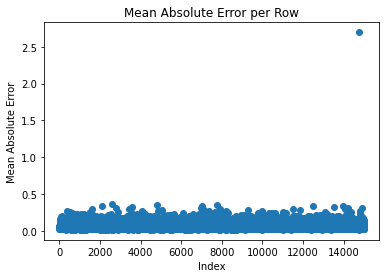

In [38]:
# scatter plot mae
plt.scatter(range(len(mae_per_row)), mae_per_row)
plt.xlabel('Index')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error per Row')
plt.show()


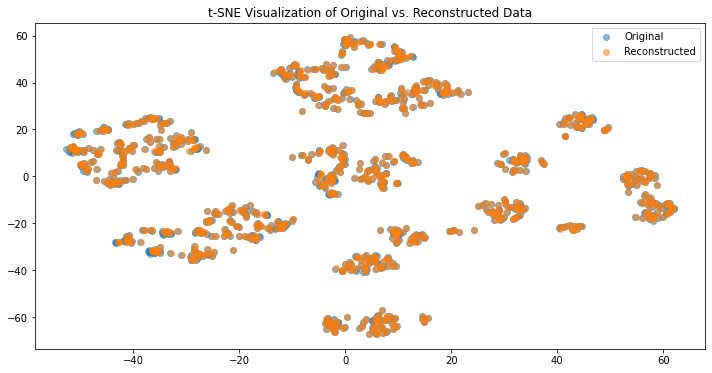

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Random sample 1000 points from the test set
np.random.seed(42)
indices = np.random.choice(x_test_scaled.shape[0], 1000, replace=False)
x_test_sample = x_test_scaled[indices]
reconstructed_test_sample = reconstructed_test[indices]

# Combine original and reconstructed vectors
X_combined = np.vstack([x_test_sample, reconstructed_test_sample])
labels = ["Original"] * len(x_test_sample) + ["Reconstructed"] * len(reconstructed_test_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_tsne[:len(x_test_sample), 0], X_tsne[:len(x_test_sample), 1], label="Original", alpha=0.5)
plt.scatter(X_tsne[len(x_test_sample):, 0], X_tsne[len(x_test_sample):, 1], label="Reconstructed", alpha=0.5)
plt.legend()
plt.title("t-SNE Visualization of Original vs. Reconstructed Data")
plt.show()


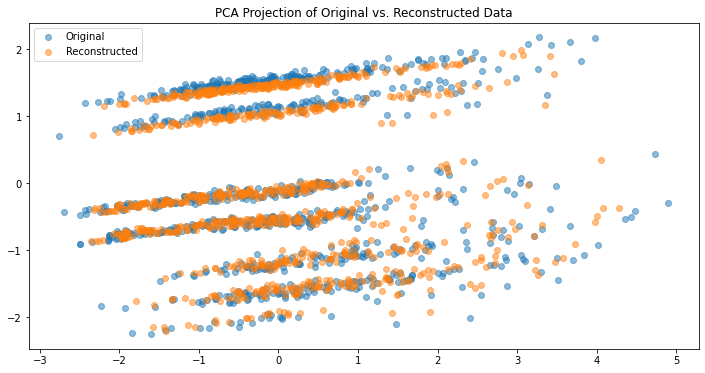

In [42]:
from sklearn.decomposition import PCA

X_combined = np.vstack([x_test_sample, reconstructed_test_sample])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:len(x_test_sample), 0], X_pca[:len(x_test_sample), 1], label="Original", alpha=0.5)
plt.scatter(X_pca[len(x_test_sample):, 0], X_pca[len(x_test_sample):, 1], label="Reconstructed", alpha=0.5)
plt.legend()
plt.title("PCA Projection of Original vs. Reconstructed Data")
plt.show()
